In [64]:
import math
import random
import pandas as pd
import numpy as np
import seaborn as sns

In [65]:
def norm(a,b):
    """
    for vector norm calculation using 2 norm
    """
    sum = 0
    for i in range(len(a)):
        sum+= math.pow(a[i]-b[i],2)
    return math.pow(sum,0.5)

def findxi(row, i, xo):
    res = row[-1]
    n = len(row)-1
    for index in range(n):
        if index != i:
            res -= row[index]*xo[index]
    if row[i]==0:
        return 0
    return res/row[i]

def randomMatrix(i,max):
    """
    return a matrix of size i, the first index would be randomized to stay within max
    """
    a = [0]*i
    a[0] = random.random()*max- max/2
    a[1] = random.random()*max- max/2
    # a[2] = random.random()*max- max/2
    # a[2] = random.random()*20 - 10

    # for index in range(i):
    #     a[index] = random.random()*max- max/2
    return a

In [66]:
def jacobi_iterative(M,x0):
    """
    solve Ax=b represented by M, with initial approximation x0
    """
    # maximum iteration
    xo = x0.copy()
    xi = xo.copy()
    max = 100
    # find rows of M
    n = len(M)
    for k in range(max):
        for i in range(n):
            a = findxi(M[i],i,xo)
            xi[i] = a
        if norm(xo,xi) < 0.0001:
            return k
        xo = xi.copy() 
    # print (xi)
    return max
    

In [67]:
M=[
    [10,-1,2,0,6],
    [-1,11,-1,3,25],
    [2,-1,10,-1,-11],
    [0,3,-1,8,15]
    ]

a = jacobi_iterative(M,[0,0,0,0])
print(a)
# jacobi_iterative(M,[0.6, 2.272727272727273, -1.1, 1.875])

12


In [68]:
list = []
for i in range(1800):
    a = randomMatrix(4,50)
    num = jacobi_iterative(M,a)
    list.append([a[0],a[1],a[2],num])

df = pd.DataFrame(list,columns = ['x','y','z','iteration'])
print(df)



              x          y  z  iteration
0     -7.312419 -21.775514  0         15
1      9.975675   4.603129  0         13
2    -10.023733  -1.440885  0         11
3    -21.997602  -6.738962  0         12
4      0.269211  20.311886  0         15
...         ...        ... ..        ...
1795 -10.881764  11.872170  0         14
1796  23.625933  22.717570  0         14
1797  -2.226941  -1.131795  0         12
1798  12.516069 -21.650283  0         15
1799  24.639057 -15.266521  0         15

[1800 rows x 4 columns]


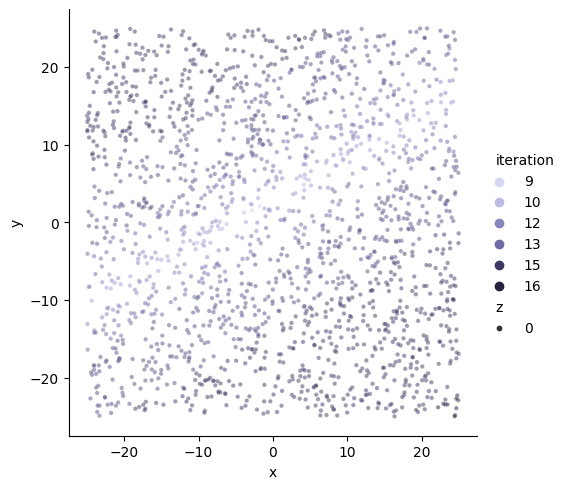

In [69]:
cmap = sns.cubehelix_palette(rot=-.01, as_cmap=True)
g = sns.relplot(
    data=df,
    x="x", y="y",
    hue="iteration",size = "z",
    palette=cmap, sizes=(10, 100),
    alpha = .5
    # s = 18
)